In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import xgboost
import warnings
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df = data.copy()

In [30]:
df.drop('RowNumber', axis = 1, inplace= True)

In [31]:
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [33]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [35]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print(f'Numerical Columns')
display(num.head())
print(f'\nCategorical Columns')
display(cat.head())

Numerical Columns


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0



Categorical Columns


,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

tobeScaled = ['Balance', 'EstimatedSalary']
scaled = {}

for i in tobeScaled:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    scaled[i + '_scaled'] = scaler
    joblib.dump(scaler, open(f'{i}_scaler.pkl','wb'))
 
scaled

{'Balance_scaled': StandardScaler(),
 'EstimatedSalary_scaled': StandardScaler()}

In [38]:
encoded = {}

for i in df.select_dtypes(exclude = 'number'):
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    encoded[i + '_encoder'] = encoder
    joblib.dump(encoder, open(f'{i}_encoder.pkl','wb'))

encoded

{'Surname_encoder': LabelEncoder(),
 'Geography_encoder': LabelEncoder(),
 'Gender_encoder': LabelEncoder()}

In [39]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,15647311,1177,608,2,0,41,1,0.117350,1,0,1,0.216534,0
2,15619304,2040,502,0,0,42,8,1.333053,3,1,0,0.240687,1
3,15701354,289,699,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,15737888,1822,850,2,0,43,2,0.785728,1,1,1,-0.365276,0


In [40]:
df.drop('CustomerId', axis = 1, inplace = True)

In [41]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,1177,608,2,0,41,1,0.117350,1,0,1,0.216534,0
2,2040,502,0,0,42,8,1.333053,3,1,0,0.240687,1
3,289,699,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,1822,850,2,0,43,2,0.785728,1,1,1,-0.365276,0


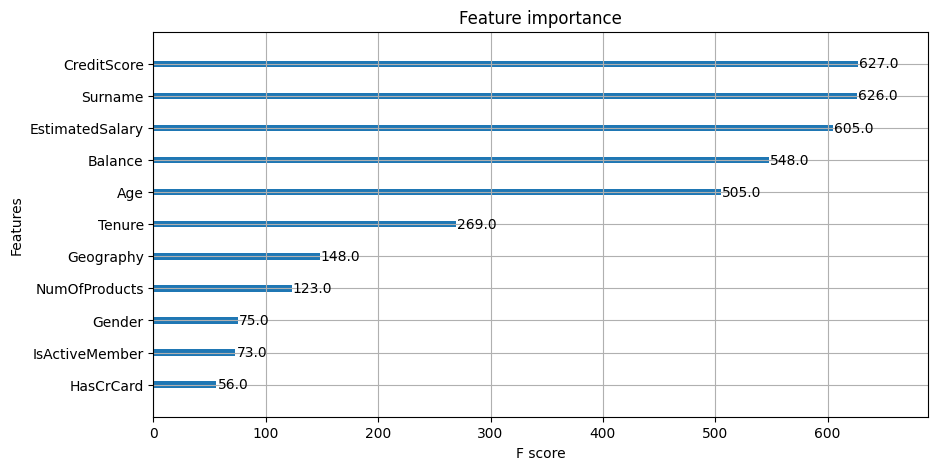

In [42]:
import matplotlib.pyplot as plt
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('Exited', axis = 1)
y = df.Exited

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)

xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [54]:
df.columns

Index(['CreditScore', 'Surname', 'EstimatedSalary', 'Balance', 'Age', 'Tenure',
       'Geography', 'NumOfProducts', 'Gender', 'IsActiveMember', 'Exited'],
      dtype='object')

In [55]:
selected_cols = ['CreditScore', 'EstimatedSalary', 'Balance', 'Age', 'Tenure', 'Geography', 'NumOfProducts', 'Gender', 'IsActiveMember', 'Exited']
df = df[selected_cols]
df.head()

,CreditScore,EstimatedSalary,Balance,Age,Tenure,Geography,NumOfProducts,Gender,IsActiveMember,Exited
0,619,0.021886,-1.225848,42,2,0,1,0,1,1
1,608,0.216534,0.117350,41,1,2,1,0,1,0
2,502,0.240687,1.333053,42,8,0,3,0,0,1
3,699,-0.108918,-1.225848,39,1,0,2,0,0,0
4,850,-0.365276,0.785728,43,2,2,1,0,1,0


In [56]:
x = df.drop('Exited', axis = 1)
y = df.Exited

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 5)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(xtrain, ytrain)

cross_validation = log_reg.predict(xtrain)
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7574
           1       0.16      0.63      0.26       426

    accuracy                           0.81      8000
   macro avg       0.57      0.72      0.58      8000
weighted avg       0.93      0.81      0.86      8000



[Text(0, 0, '7963'), Text(0, 0, '2037')]

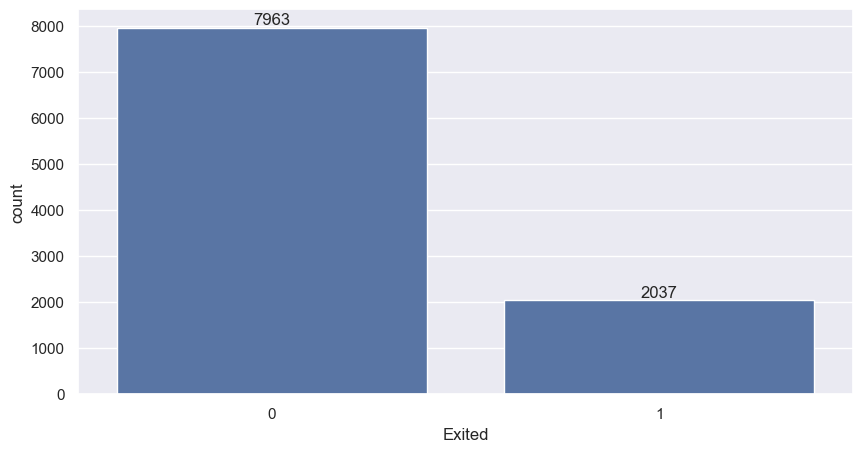

In [58]:
fig = sns.countplot(x = df.Exited)
fig.bar_label(fig.containers[0])

[Text(0, 0, '6370'), Text(0, 0, '6370')]

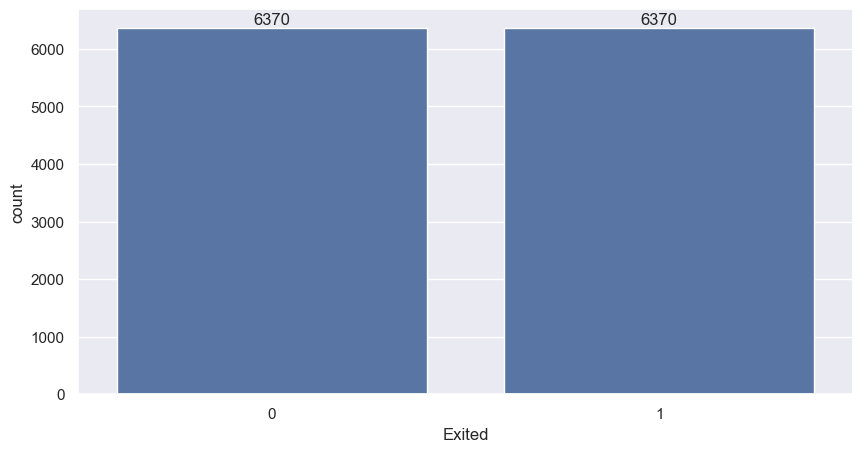

In [59]:
from imblearn.over_sampling import SMOTE

x = df.drop('Exited', axis = 1)
y = df.Exited

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 23)

smote = SMOTE(sampling_strategy= 'auto', random_state=5)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

fig = sns.countplot(x = y_resampled)
fig.bar_label(fig.containers[0])

In [60]:
from sklearn.ensemble import RandomForestClassifier

rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)

# Model Evaluation
cross_validation = rand_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1516
           1       0.63      0.53      0.57       484

    accuracy                           0.81      2000
   macro avg       0.74      0.71      0.73      2000
weighted avg       0.80      0.81      0.80      2000



<Axes: >

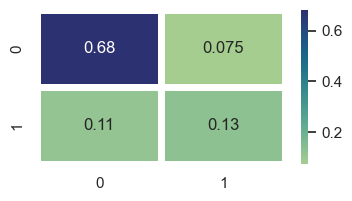

In [61]:
pred = rand_model.predict(xtest) 
print(classification_report(pred, ytest))


import numpy as np
revealer = confusion_matrix(pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [62]:
joblib.dump(log_reg, open('ChurnModell.pkl', 'wb'))